# Measuring exploitation-exploration behaviour of neighbourhood operators

The transition matrix $p_{i,j}$ gives the probability of a transition from point $i$ to point $j$ in a single application of the neighbourhood operator. We can define several interesting quantities in terms of this matrix.

For any point $i$, other points $j$ are *near to* $i$ to the extent that $p_{i,j}$ is large. We can define $d(i, j) = -log(p_{i,j})$ as a distance (not a true metric) between points. This distance does not take syntactic, semantic, or any other type of *similarity* between $i$ and $j$ into account: it expresses only their *proximity* as measured by one-step transition probabilities.

We can define a binary relation, *neighbourhood*: point $j$ is a neighbour of point $i$ if $p_{i,j} \neq 0$.

We wish to quantify the idea that some operators are more exploitative, others more explorative. We will give a definition for *exploitativeness*: high values will indicate an exploitative operator, while low values will indicate an explorative operator. The main idea is *peakedness within each row of the transition matrix*. If the row $p_{i,\cdot}$ corresponding to transitions outward from point $i$ is strongly peaked, that indicates that if we are currently at point $i$, then the next point in the search is highly likely to come from just one of a few points $j$ with high $p_{i,j}$. These are the neighbours of $i$ (or the nearest neighbours of $i$, in terms of $d$). In contrast, if the row is not strongly peaked, that indicates that the next point in the search could come from almost anywhere in the space. In an extreme case, a row might be entirely flat, in which case there is no bias towards any point, and the search reduces to random search.

We quantify peakedness in a single row using the coefficient of variation (CV), defined as $CV(x) = SD(x)/M(x)$ where $SD$ is the standard deviation and $M$ the mean of a vector $x$. The SD alone represents peakedness, but CV does so in a scale-independent way.

We can then quantify the exploitativeness of an operator as the mean of the CV across rows, $\frac{\sum_{i=0}^{N-1} CV(p_{i,\cdot})}{N}$. As already stated, high values indicate an exploitative operator, while low values indicate an explorative operator.



# Calculation and properties of *exploitativeness*

In the following, we use $N$ to indicate the size of the space.  

The mean transition probability is $1/N$, where $N$ is the size of the space, since transition probabilities in a single row must sum to 1.

## A common special case

For some operators, every point $i$ has the same number of neighbours $m$, and all have an equal transition probability $1/m$. In this common special case, the value of exploitativeness can be calculated as follows. Recall that SD is defined as $$\sqrt{\frac{\sum (x_i - \mu(x))^2}{N}}$$ where $x_i$ are the items for $i=1\ldots N$ and $\mu$ indicates the mean. The numerator is a sum of squared differences. In our case there are $m$ neighbours, each of transition probability $p=1/m$. There are $N-m$ non-neighbours, each of transition probability 0. The mean transition probability is $1/N$. The sum of squared differences is thus $$ssq = m(1/m - 1/N)^2 + (N-m)(0 - 1/N)^2$$ Then the variance $v = ssq/N$, and $SD =\sqrt{v}$, and finally $CV =N \cdot SD$. Since all rows will give equal CV, this is the value for exploitativeness of such an operator: $$N \sqrt{\frac{m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)}{N}}$$

This simplifies to: $$\sqrt{\frac{1}{m} \left(N - m\right)}$$

### Example: bitstrings of length $n$

In the space of bitstrings of length $n$, the size of the space $N=2^n$. Using a per-individual mutation operator (ie we carry out one bit-flip per mutation event),
we have $m=n$. Exploitativeness is equal to $$\sqrt{\frac{1}{n} \left(2^{n} - n\right)}$$



FIXME check operator precedence above!

In [76]:
import numpy as np
from sympy import symbols, Symbol, simplify, latex
from sympy import binomial, sqrt, cbrt, factorial, Sum, log
import math
import os.path
import matplotlib.pyplot as plt
import scipy.misc
%matplotlib inline
from sympy.interactive import printing
printing.init_printing(use_latex=True)
nCk = lambda n, k: scipy.misc.comb(n, k, True)

In [117]:
n = Symbol('n', integer=True, positive=True) # a parameter specifying size of representation
N = Symbol('N', integer=True, positive=True) # size of space
m = Symbol('m', integer=True) # number of neighbours (special cases)
h = Symbol("h", integer=True) # Hamming distance
p = Symbol("p", integer=False) # per-gene mutation probability

N_b = 2**n
N_p = factorial(n-1)
# N_t = ? # trees

In [78]:
ssqd = m * (1/m - 1/N)**2 + (N-m) * (0 - 1/N)**2

SD_with_m_equal_neighbours = sqrt(ssqd / N)
SD_with_m_equal_neighbours_simp = simplify(SD_with_m_equal_neighbours)

print("SD with m equal neighbours")
print(SD_with_m_equal_neighbours)
print(latex(SD_with_m_equal_neighbours))

SD_bitstring_per_ind = SD_with_m_equal_neighbours_simp.subs([(N, 2**n), (m, n)])
print("SD for bitstrings with per-individual bit-flip")
print(SD_bitstring_per_ind)
print(latex(SD_bitstring_per_ind))
    
SD_permutation_swap_adj = SD_with_m_equal_neighbours_simp.subs([(N, factorial(n-1)), (m, n)])
print("SD for permutations with swap-adjacent")
print(SD_permutation_swap_adj)
print(latex(SD_permutation_swap_adj))


SD with m equal neighbours
sqrt(m*(1/m - 1/N)**2 + (N - m)/N**2)/sqrt(N)
\frac{1}{\sqrt{N}} \sqrt{m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)}
SD for bitstrings with per-individual bit-flip
2**(-n)*sqrt(2**n - n)/sqrt(n)
\frac{\sqrt{2^{n} - n}}{2^{n} \sqrt{n}}
SD for permutations with swap-adjacent
sqrt(-n + factorial(n - 1))/(sqrt(n)*factorial(n - 1))
\frac{\sqrt{- n + \left(n - 1\right)!}}{\sqrt{n} \left(n - 1\right)!}


In [121]:

gini_T = 1/2.0
gini_N = 1
gini_m = m / N
gini_B_m_equal_neighbours = gini_m * gini_N / 2.0
gini_A_m_equal_neighbours = gini_T - gini_B_m_equal_neighbours
gini_m_equal_neighbours = gini_A_m_equal_neighbours / gini_T

G = gini_m_equal_neighbours.subs([(N, 2**n), (m, n)])
print G
print G.subs(n, 5).evalf()

1.0 - 1.0*2**(-n)*n
0.843750000000000


In [79]:
def gini_m_equal_neighbours_fn(N, m):
    """This is just a function that calculates numerically the same thing as given in the formula above"""

    # we normalise so that the width and height of the chart are 1
    m /= float(N)
    N /= float(N)

    T = 1/2.0 # area under the 45-degree line of perfect equality

    # B is the area below the Lorentz curve
    # B is zero, up till the last *m* points, then it goes up linearly,
    # so the area is a right triangle whose adjacent sides 
    # (the width and height) are m and N
    B = m * N / 2.0
    
    A = T - B # by definition
    G = A / (A+B) # by definition
    return G

def gini_coeff(x):

    """A measure of inequality in a distribution. From
    http://www.ellipsix.net/blog/2012/11/the-gini-coefficient-for-distribution-inequality.html"""
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x)) # calculates zero-based ranks
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)


CV with m equal neighbours
```N*sqrt((m*(1/m - 1/N)**2 + (N - m)/N**2)/N)```
$$N \sqrt{\frac{1}{N} \left(m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)\right)}$$

CV with m equal neighbours, simplified
$$\frac{N}{\left\lvert{N}\right\rvert} \sqrt{\frac{1}{m} \left(N - m\right)}$$

CV for bitstrings with per-individual bit-flip
```sqrt((2**n - n)/n))```

$$\sqrt{\frac{1}{n} \left(2^{n} - n\right)}$$

CV for permutations with swap-adjacent
```sqrt((-n + factorial(n - 1))/n)*factorial(n - 1)/Abs(factorial(n - 1)))```

$$\frac{\left(n - 1\right)!}{\left\lvert{\left(n - 1\right)!}\right\rvert} \sqrt{\frac{1}{n} \left(- n + \left(n - 1\right)!\right)}$$


In [80]:
def plot_expl(x, vals, ylabel, filename):
    fig, ax = plt.subplots(figsize=(4, 2.5))
    ax.plot(x, vals)
    plt.xlabel("$n$")
    plt.ylabel(ylabel)
    plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.savefig(os.path.join(basedir, filename+".pdf"))
    plt.savefig(os.path.join(basedir, filename+".eps"))
    plt.savefig(os.path.join(basedir, filename+".png"))
    del ax
    del fig
    

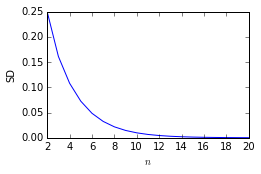

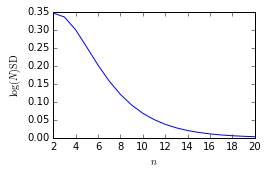

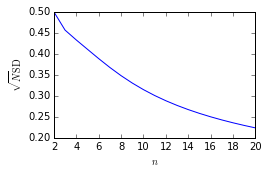

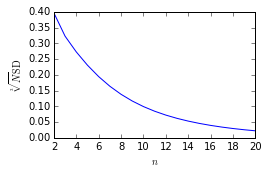

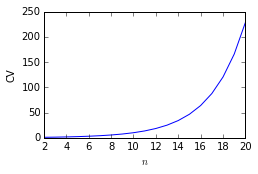

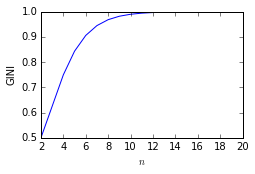

In [81]:
x = range(2, 21)
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_bitstring/"
plot_expl(x, [SD_bitstring_per_ind.subs(n, i).evalf() for i in x], "SD", "per_ind_sd")
plot_expl(x, [(log(N) * SD_bitstring_per_ind).subs(N, 2**n).subs(n, i).evalf() for i in x], "$\log(N)\mathrm{SD}$", "per_ind_log_sd")
plot_expl(x, [(sqrt(N) * SD_bitstring_per_ind).subs(N, 2**n).subs(n, i).evalf() for i in x], "$\sqrt{N}\mathrm{SD}$", "per_ind_sqrt_sd")
plot_expl(x, [(cbrt(N) * SD_bitstring_per_ind).subs(N, 2**n).subs(n, i).evalf() for i in x], "$\sqrt[3]{N}\mathrm{SD}$", "per_ind_cbrt_sd")
plot_expl(x, [(N * SD_bitstring_per_ind).subs(N, 2**n).subs(n, i).evalf() for i in x], "CV", "per_ind_cv")
plot_expl(x, [gini_m_equal_neighbours(2**n, n) for n in x], "GINI", "per_ind_gini")

### Example: bitstrings of length $n$ with a per-gene mutation probability

In this case, all points in the space are neighbours, with differing transition probabilties, so the previous special case cannot be used. With per-gene mutation probability $p$, the transition probability to an individual whose Hamming distance is $h$ is $$p^h (1 - p)^{n - h}$$

How many individuals are there at Hamming distance $h$? For $h=0$, there are 1. For $h=1$, there are $n$. For $h=2$, there are $\binom{n}{2}$. In general, there are $\binom{n}{h}$

As in the per-individual mutation above, the mean value of $t$ is $1/2^n$. So the variance $$v = \frac{\sum_{h=0}^n \left(\binom{n}{h} (p^h (1-p)^{n-h}) - 1/2^n \right)^2}{2^n}$$

Again $SD = \sqrt{v}$ and $CV = N\cdot SD$.

In [246]:
def test():
    n = 10
    p = 0.001
    N = 2**n
    sigma_f = math.sqrt(
        sum(
            nCk(n, h) * # number of individuals at Hamming distance h
            (p**h * (1.0-p)**(n-h) # transition probability for each individual
             - 
             1.0/N # mean transition probability
            )**2 # squared difference
            for h in range(n+1) # [0, 1, ... n]
            ) / N # variance
        ) # stddev
    coefvar_f = N * sigma_f
    return sigma_f, coefvar_f
print test()

(0.030923641528236703, 31.665808924914383)


In [126]:
SD_bitstring_per_gene = sqrt(Sum(binomial(n, h) * ((p**h * (1-p)**(n-h)) - 1/2**n)**2,
                                     (h, 0, n))/N)
CV_bitstring_per_gene = N * SD_bitstring_per_gene

print("CV_bitstring_per_gene")
print(CV_bitstring_per_gene)
print(latex(CV_bitstring_per_gene))
print("CV_bitstring_per_gene with n=10 and p=0.001")
print(CV_bitstring_per_gene.subs([(N, 2**n), (n, 10), (p, 0.001)]).evalf())

CV_bitstring_per_gene
sqrt(N)*sqrt(Sum((p**h*(-p + 1)**(-h + n) - 2**(-n))**2*binomial(n, h), (h, 0, n)))
\sqrt{N} \sqrt{\sum_{h=0}^{n} \left(p^{h} \left(- p + 1\right)^{- h + n} - 2^{- n}\right)^{2} {\binom{n}{h}}}
CV_bitstring_per_gene with n=10 and p=0.001
31.6658089249144


In [138]:
# GINI for per-gene mutation with bitstrings.
# there are C(n, h) individuals of prob p**h(1-p)**(n-h)
# divide each term by 2**n to normalise graph to area 1x1
def gini_per_gene_B(n):
    B = 0
    # assuming p < 0.5, the smallest probs are for large h
    for h in range(n, -1, -1):
        # cumulative sum: B += B +...
        B += B + binomial(n, h) * (p**h * (1-p)**(n-h)) / (2**n)
    return B
print gini_per_gene_B(4)
print gini_per_gene_B(4).subs(n, 4).subs(p, 0.01)
#print gini_per_gene_B().subs(n, 4).subs(p, 0.01).evalf()
gini_per_gene_A = 1.0/2 - gini_per_gene_B(4)
gini_per_gene = 2 * gini_per_gene_A
print gini_per_gene.subs([(n, 4), (p, 0.01)]).evalf()

p**4 + 2*p**3*(-p + 1) + 3*p**2*(-p + 1)**2/2 + p*(-p + 1)**3/2 + (-p + 1)**4/16
0.0650377506250000
0.869924498750000


$$N \sqrt{\frac{\sum_{h=0}^{n} {\binom{n}{h}} \left(p^{h} \left(1-p \right)^{n - h} - \frac{1}{2^n}\right)^{2}}{N}}$$

$\sum_{h=0}^{n} \frac{p^{h} {\binom{n}{h}}}{2^{n}} \left(- p + 1\right)^{- h + n}$

In [141]:
# http://stackoverflow.com/questions/4983258/python-how-to-check-list-monotonicity 
def non_decreasing(x):
    dx = np.diff(x)
    return np.all(dx >= 0)

In [143]:
def gini_per_gene_explicit(n, p):
    probs = np.zeros(2**n)
    i = 0
    for h in range(n, -1, -1):
        for j in range(binomial(n, h)):
            probs[i] = (p**h * (1-p)**(n-h)) / (2**n)
            i += 1
    print probs
    print gini_coeff(probs)
    assert non_decreasing(probs)
    cum_probs = np.cumsum(probs)
    B = np.sum(cum_probs) / (2**n)
    T = 1 / 2.0
    A = T - B
    return A / T
gini_per_gene_explicit(4, 0.01)

[  6.25000000e-10   6.18750000e-08   6.18750000e-08   6.18750000e-08
   6.18750000e-08   6.12562500e-06   6.12562500e-06   6.12562500e-06
   6.12562500e-06   6.12562500e-06   6.12562500e-06   6.06436875e-04
   6.06436875e-04   6.06436875e-04   6.06436875e-04   6.00372506e-02]
0.92481375


0.99139460937500001

In [128]:


def prob(p, n, h):
    return p**h * (1-p)**(n-h)

prob(0.1, 5, 5)

1.0000000000000003e-05

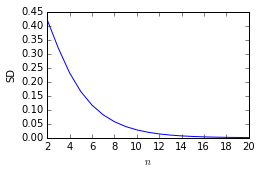

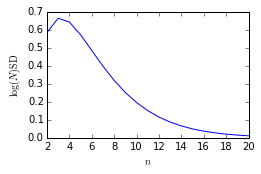

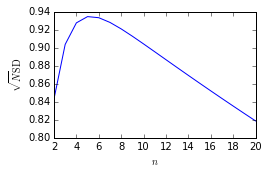

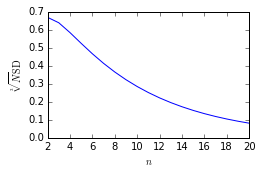

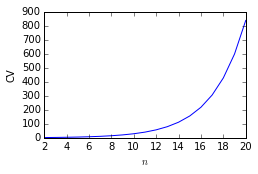

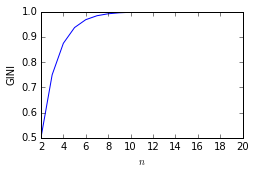

In [129]:
x = range(2, 21)
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_bitstring/"
plot_expl(x, [SD_bitstring_per_gene.subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "SD", "per_gene_0.010_sd.pdf")
plot_expl(x, [(log(N) * SD_bitstring_per_gene).subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "$\log(N)\mathrm{SD}$", "per_gene_0.010_log_sd.pdf")
plot_expl(x, [(sqrt(N) * SD_bitstring_per_gene).subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "$\sqrt{N}\mathrm{SD}$", "per_gene_0.010_sqrt_sd.pdf")
plot_expl(x, [(cbrt(N) * SD_bitstring_per_gene).subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "$\sqrt[3]{N}\mathrm{SD}$", "per_gene_0.010_cbrt_sd.pdf")
plot_expl(x, [(N * SD_bitstring_per_gene).subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "CV", "per_gene_0.010_cv.pdf")
plot_expl(x, [gini_per_gene.subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "GINI", "per_gene_0.010_gini.pdf")

### Example: permutations of length $n$

In a space of permutations of length $n$, $N=n!/n = (n-1)!$.

With the swap-adjacent operator, there are $m=n$ neighbours of equal transition probability $p=1/m$, so we again use the expression for $m$ neighbours of probability $1/m$. The expression for CV comes out to be
$$\frac{1}{\sqrt{n}} \sqrt{- n + \left(n - 1\right)!}$$

Swap-adjacent has $m=n$, all equal.

Swap-two has $m=n(n-1)/2$, all equal.

Two-opt has $m=n(n-3)/2$, all equal.

Three-opt has $m=4 n (n-4) (n-5) / 6$, all equal.

Three-opt-broad has $4n(n-4)(n-5)/6 < m < 7n(n-4)(n-5)/6$ -- not all equal -- three different possible values, which I don't yet understand.

Twoh-opt has $m = n(n-2)-n = n(n-3)$. We have $n(n-4)$ neighbours where $p=\frac{1}{n(n-2)}$, and $n$ neighbours where $p=\frac{2}{n(n-2)}$. This happens because we "expect" $m=n(n-2)$ by inspection of the method, each with $p=n$, but $n$ of the neighbours occur twice (getting twice the probability), reducing the number of neighbours to $n(n-2)-n$.

In [269]:
CV_permutation_swap_adj = CV_with_m_equal_neighbours_simp.subs([(N, factorial(n-1)), (m, n)])
print("CV for permutations with swap-adjacent operator")
print(CV_permutation_swap_adj)
print(latex(CV_permutation_swap_adj))
print("CV_permutation_swap_adj with n=10")
print(CV_permutation_swap_adj.subs(n, 10).evalf())

CV for permutations with swap-adjacent operator
sqrt(-n + factorial(n - 1))/sqrt(n)
\frac{1}{\sqrt{n}} \sqrt{- n + \left(n - 1\right)!}
CV_permutation_swap_adj with n=10
190.491469625283


In [22]:
mean_p = 1/N
ssqd = n*(n-4)*(1/(n*(n-2)) - mean_p)**2 + n*(2/(n*(n-2)) - mean_p)**2
SD_permutation_twoh_opt = sqrt(ssqd / N).subs(N, factorial(n-1))
CV_permutation_twoh_opt = (N * SD_permutation_twoh_opt).subs(N, factorial(n-1))
print("CV for permutations with twoh-opt operator")
print(CV_permutation_twoh_opt)
print(latex(CV_permutation_twoh_opt))
print("Simplified")
CV_permutation_twoh_opt_simp = simplify(CV_permutation_twoh_opt)
print(CV_permutation_twoh_opt_simp)
print(latex(CV_permutation_twoh_opt_simp))
print("CV_permutation_twoh_opt with n=10")
print(CV_permutation_twoh_opt.subs(n, 10).evalf())

CV for permutations with twoh-opt operator
sqrt(n*(n - 4)*(-1/factorial(n - 1) + 1/(n*(n - 2)))**2 + n*(-1/factorial(n - 1) + 2/(n*(n - 2)))**2)*sqrt(factorial(n - 1))
\sqrt{n \left(n - 4\right) \left(- \frac{1}{\left(n - 1\right)!} + \frac{1}{n \left(n - 2\right)}\right)^{2} + n \left(- \frac{1}{\left(n - 1\right)!} + \frac{2}{n \left(n - 2\right)}\right)^{2}} \sqrt{\left(n - 1\right)!}
Simplified
sqrt(n**6 - 7*n**5 + 16*n**4 - 2*n**3*factorial(n) - 12*n**3 + 8*n**2*factorial(n) - 8*n*factorial(n) + (factorial(n))**2)/(sqrt(n)*Abs(n - 2)*sqrt(factorial(n)))
\frac{1}{\sqrt{n} \left\lvert{n - 2}\right\rvert \sqrt{n!}} \sqrt{n^{6} - 7 n^{5} + 16 n^{4} - 2 n^{3} n! - 12 n^{3} + 8 n^{2} n! - 8 n n! + n!^{2}}
CV_permutation_twoh_opt with n=10
75.2861221799957


### Permutation twoh-opt

My version:

$$(n-1)! \sqrt{\frac{n \left(n - 4\right) \left(\frac{1}{n \left(n - 2\right)} - \frac{1}{\left(n - 1\right)!}\right)^{2} + n \left(\frac{2}{n \left(n - 2\right)} - \frac{1}{\left(n - 1\right)!}\right)^{2}}{\left(n - 1\right)!}}$$

Sympy gives:
$$\sqrt{n \left(n - 4\right) \left(- \frac{1}{\left(n - 1\right)!} + \frac{1}{n \left(n - 2\right)}\right)^{2} + n \left(- \frac{1}{\left(n - 1\right)!} + \frac{2}{n \left(n - 2\right)}\right)^{2}} \sqrt{\left(n - 1\right)!}$$

Simplifies to:
$$\frac{1}{\sqrt{n} \left\lvert{n - 2}\right\rvert \sqrt{n!}} \sqrt{n^{6} - 7 n^{5} + 16 n^{4} - 2 n^{3} n! - 12 n^{3} + 8 n^{2} n! - 8 n n! + n!^{2}}$$

swap_adj
swap_two
two_opt
three_opt
twoh_opt


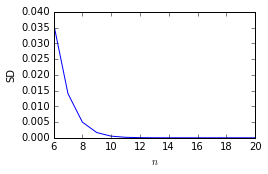

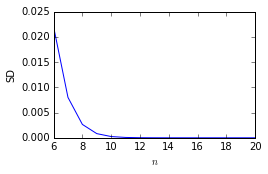

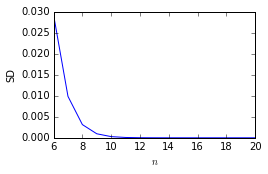

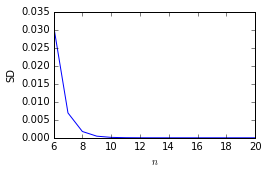

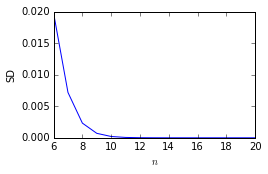

In [24]:
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_permutation/"
ops_mvals = [
    ("swap_adj", n),
    ("swap_two", n*(n-1)/2),
    ("two_opt", n*(n-3)/2),
    ("three_opt", 4*n*(n-4)*(n-5)/6),
    ]
x = range(6, 21)
for op, mval in ops_mvals:
    print op
    plot_expl(x, [SD_with_m_equal_neighbours_simp.subs(
                [(N, factorial(n-1)), (m, mval), (n, i)]).evalf() for i in x], 
              "SD",
            op+"_sd.pdf")
print "twoh_opt"
plot_expl(x, [SD_permutation_twoh_opt.subs(n, i).evalf() for i in x], 
          "SD", "twoh_opt_sd.pdf")

In [276]:
def test2():
    n = 9
    print 4*n*(n-4)*(n-5)/6.0
test2()

120.0


In [6]:

def theils_t(x):
    xbar = x.mean()
    xnorm = x / xbar
    s = xnorm * np.log(xnorm)
    T = 1.0 / len(x) * np.sum(s)
    return T
x = np.zeros(10)
x[0] = 1.0
theils_t(x)

/Users/jmmcd/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/Users/jmmcd/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


nan

In [7]:
xbar = x.mean()
xnorm = x / xbar

In [8]:
xnorm

array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [9]:
x

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
xbar

0.10000000000000001

In [11]:
xnorm * np.log(xnorm)

/Users/jmmcd/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/jmmcd/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


array([ 23.02585093,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan])

In [74]:
n = 5
N_b = 2**n
m = n
print "GINI by formula for bitstrings length ", n
print gini_m_equal_neighbours(N_b, m)
x = np.zeros(N_b)
x[N_b - m:] = 1.0 / m
print "GINI explicitly by construction of x", x
print gini_coeff(x)




GINI by formula for bitstrings length  5
0.84375
GINI explicitly by construction of x [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.2  0.2  0.2
  0.2  0.2]
0.84375


In [145]:
import scipy.stats
KL = scipy.stats.entropy

In [151]:
n = 5
N_b = 2**n
m = n
x = np.zeros(N_b)
x[N_b - m:] = 1.0 / m
y = np.ones(N_b) / float(N_b)
print KL(x, x) # 0
print KL(x, y) # interesting
print KL(y, x) # inf, because x has some non-zero values where y doesn't, hence divide by zero
print KL(y, y) # zero again, because both have zeros (hence divide by zero) but in same places

0.0
1.85629799037
inf
0.0


Example: abstract space with several operators
---

Let's consider a purely abstract space on $N$ points, which we can denote $1\ldots N$. Let's define a few operators to help us think:

1. the uniform operator, ie random-search operator, where all transition probabilities are equal, $1/N$
2. the deterministic operator, where there is a single possible outcome to mutation, hence all probabilities are zero except for one with probability 1
3. a "ten-per-cent" operator where the number of neighbours is (say) 10 per cent of the size of the space, and all have equal probability. 
4. a log operator, where the number of neighbours is $floor(\log(N))$ -- equivalent to the per-ind mutation operator in a bitstring space

The point of considering these is that each may have different scaling behaviour. We have to think about how exploitativeness scales for each of these. Is there really any way to keep the values consistent?



This gives us a way to scale! The uniform operator gives the lowest possible value of exploitativeness for a given $N$; the deterministic operator the highest; call them lb and ub. Then for any operator, define their scaled exploitativeness as (x - lb) / (ub - lb).

We could use Gini, SD, CV, KL. SD is nice because it's the same as RMSE, and we could re-use that again later for operator difference. KL has a more statistical feel to it. CV is a good normalisation. Maybe we should just pick one, and admit it doesn't make a big difference.

What discrete distribution gives the largest possible SD, CV, Gini, or KL? In all cases, it's the all-zeros-but-one, the deterministic operator. And the lowest is the uniform (random search) operator. For SD and CV we immediately see that it's zero; for KL it's KL(p, p) = 0 by definition; for Gini it's 0 as well (the difference between the cdf and the 45-degree cdf).

To calculate exploitativeness (the scaled version) for a given operator, we'll need to know its distribution. We'll be calculating the Gini, KL, SD or CV (mostly done above for several operators). Then we'll be comparing against the uniform and discrete operators' values for these measures. So, for example, we know the uniform operator will give lb = 0. We know the discrete operator will give [0, 0, 0, ... 1], so we need to calculate the SD, CV, Gini, and KL for that. Eg SD = 